In [1]:
# Import the required libraries.
# !pip install tensorflow
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

# from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
# if tf.test.is_gpu_available():
#   print("GPU is available.")
# else:
#   print("GPU is not available.")

# # Get a list of all physical devices available to TensorFlow
# devices = tf.config.list_physical_devices()

# # Print the names of all GPUs
# for device in devices:
#   if device.device_type == "GPU":
#     print(device.name)

In [3]:


# # # Path to the directory containing folders for each person
# # input_dir = r"C:\Users\Lenovo\Desktop\LBP\data_v2"
# # # Path to the directory where resized images will be saved
# # output_dir = r"C:\Users\Lenovo\Desktop\LBP\data_v3"
# # # Target size for resizing
# # target_size = (224, 224)  # Specify your target size here

# # # Iterate over all folders (each representing a person)
# for person_folder in os.listdir(input_dir):
#     person_path = os.path.join(input_dir, person_folder)
#     # Check if the item in the directory is a folder
#     os.makedirs(os.path.join(output_dir, person_folder), exist_ok=True)
#         # Iterate over all files in the person's folder
#     for filename in os.listdir(person_path):
#             # Check if the file is an image file
#         if filename.endswith('.jpg') or filename.endswith('.jpeg'):
#                 # Open the image file
#             with Image.open(os.path.join(person_path, filename)) as img:
#                     # Resize the image
#                 resized_img = img.resize(target_size)
#                     # Save the resized image to the output directory
#                 resized_img.save(os.path.join(output_dir, person_folder, filename))


In [4]:
# import os
# import cv2

# # Load the pre-trained face detection model
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Path to the folder containing multiple folders of people
# input_dir = r'C:\Users\Lenovo\Desktop\LBP\data_v3'

# # Path to the folder where you want to save the cropped faces
# output_dir = r'C:\Users\Lenovo\Desktop\LBP\data_v4'
# os.makedirs(output_dir, exist_ok=True)

# # Iterate over all the folders of people
# for person_folder in os.listdir(input_dir):
#     person_path = os.path.join(input_dir, person_folder)
#     # Check if the item in the directory is a folder
#     if os.path.isdir(person_path):
#         out_dir = os.path.join(output_dir, person_folder)
#         os.makedirs(out_dir, exist_ok=True)
#         # Iterate over all files in the person's folder
#         for filename in os.listdir(person_path):
#             # Check if the file is an image file
#             if filename.endswith('.jpg') or filename.endswith('.jpeg'):
#                 # Open the image file
#                 image_path = os.path.join(person_path, filename)
#                 image = cv2.imread(image_path)
#                 if image is None:
#                     continue
#                 # Convert the image to grayscale
#                 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#                 # Detect faces in the image
#                 faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
#                 # Cut out the face(s) and save them
#                 for i, (x, y, w, h) in enumerate(faces):
#                     face = image[y:y+h, x:x+w]
#                     output_file = os.path.join(out_dir, f'{filename}_{i}.jpg')
#                     cv2.imwrite(output_file, face)


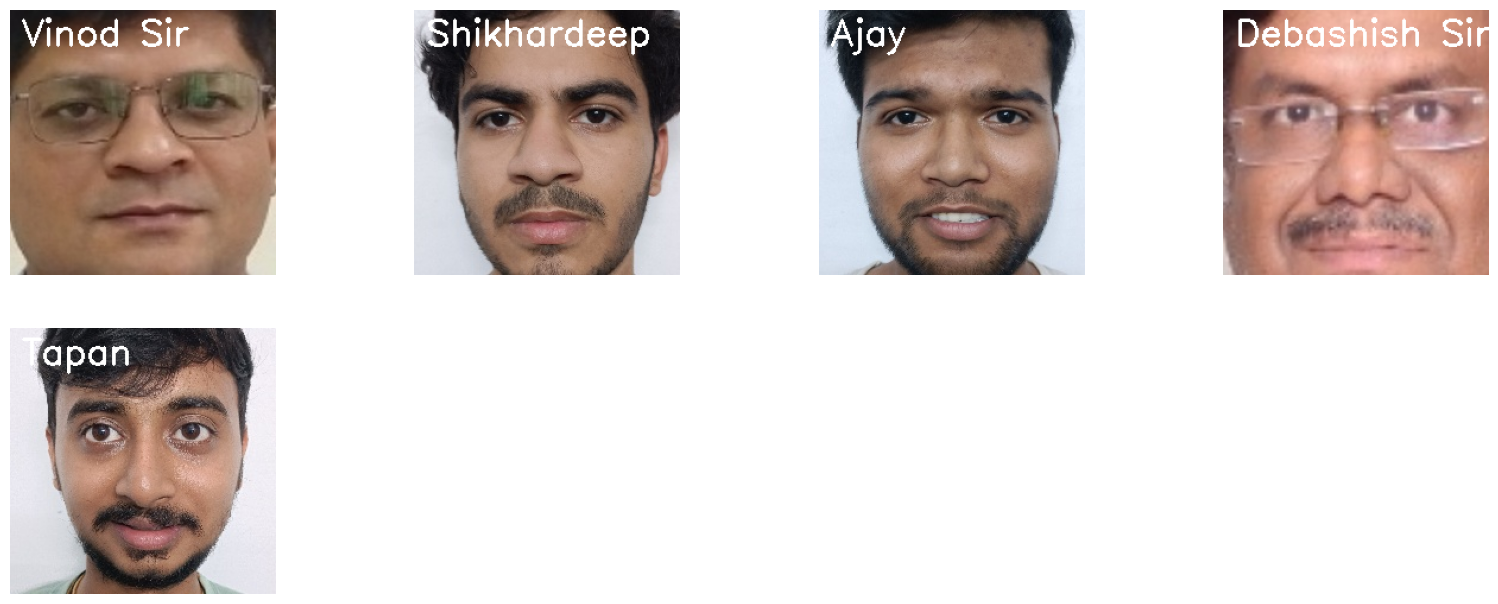

In [5]:
plt.figure(figsize=(20, 20))

all_classes_names = os.listdir(r"C:\Users\Lenovo\Desktop\lbp_1\dataset")
sample_size = min(20, len(all_classes_names))
random_range = random.sample(all_classes_names, sample_size)

for counter, selected_class_name in enumerate(random_range, 1):
    img_files_names_list = os.listdir(fr'C:\Users\Lenovo\Desktop\lbp_1\dataset/{selected_class_name}')
    selected_img_file_name = random.choice(img_files_names_list)
    img = cv2.imread(fr'C:\Users\Lenovo\Desktop\lbp_1\dataset/{selected_class_name}/{selected_img_file_name}')
    
    rgb_frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2)
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

plt.show()


In [6]:
IMAGE_HEIGHT , IMAGE_WIDTH = 224,224
DATASET_DIR = r"C:\Users\Lenovo\Desktop\lbp_1\dataset"

classes = []
folders = [f for f in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, f))]
for folder in folders:
    classes.append(folder)

In [7]:
classes

['Ajay', 'Debashish Sir', 'Shikhardeep', 'Tapan', 'Vinod Sir']

In [8]:
def create_dataset():
    feature = []
    labels = []
    img_files_path = []
    for class_index, class_name in enumerate(classes):
        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join(DATASET_DIR,class_name))
        for file_name in files_list:
            img_file_path = os.path.join(DATASET_DIR,class_name,file_name)
#             frame = frame_extraction(video_file_path)
#             if(len(frame) == SEQUENCE_LENGTH):
#                 feature.append(frame)
#                 labels.append(class_index)
#                 video_files_path.append(video_file_path)
            img = cv2.imread(img_file_path)
            feature.append(img)
            labels.append(class_index)
            img_files_path.append(img_file_path)
    feature = np.asarray(feature)
    labels = np.array(labels)
    return feature,labels,img_file_path


In [9]:
features,labels,img_file_paths = create_dataset()

Extracting Data of Class: Ajay
Extracting Data of Class: Debashish Sir
Extracting Data of Class: Shikhardeep
Extracting Data of Class: Tapan
Extracting Data of Class: Vinod Sir


In [10]:
features = features.astype(float)/255

In [11]:
from keras.utils import to_categorical
one_hot_encoded_labels = to_categorical(labels)


In [12]:
import pandas as pd
pd.DataFrame(one_hot_encoded_labels)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
227,0.0,0.0,0.0,0.0,1.0
228,0.0,0.0,0.0,0.0,1.0
229,0.0,0.0,0.0,0.0,1.0
230,0.0,0.0,0.0,0.0,1.0


In [13]:
features_train,features_test,labels_train,labels_test = train_test_split(features,one_hot_encoded_labels,test_size=0.20,shuffle=True)

In [14]:
features_train.shape

(185, 224, 224, 3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)     

In [14]:
# # Create an Instance of Early Stopping Callback
# # without attention
# import keras
# from keras import layers
# early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# # Compile the model and specify loss function, optimizer and metrics values to the model
# # opt = keras.optimizers.Adam(learning_rate=0.01)

# # callbacks = [early_stopping_callback]
# # convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ["accuracy"])

# # Start training the model. --> vary bacth size and epochs
# model_training_history = model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 8,
#                                                      shuffle = True, validation_split = 0.2,
#                                    callbacks=[early_stopping_callback]
#                                   )

Epoch 1/100
19/19 [==============================] - 13s 293ms/step - loss: 14.3513 - accuracy: 0.5946 - val_loss: 18.4389 - val_accuracy: 0.2703
Epoch 2/100
19/19 [==============================] - 2s 94ms/step - loss: 8.2979 - accuracy: 0.8514 - val_loss: 35.8127 - val_accuracy: 0.1622
Epoch 3/100
19/19 [==============================] - 2s 94ms/step - loss: 5.6136 - accuracy: 0.8851 - val_loss: 34.0289 - val_accuracy: 0.2973
Epoch 4/100
19/19 [==============================] - 2s 94ms/step - loss: 2.4382 - accuracy: 0.9054 - val_loss: 72.5739 - val_accuracy: 0.1351
Epoch 5/100
19/19 [==============================] - 2s 94ms/step - loss: 1.6918 - accuracy: 0.9527 - val_loss: 80.3573 - val_accuracy: 0.1351
Epoch 6/100
19/19 [==============================] - 2s 95ms/step - loss: 2.3713 - accuracy: 0.9662 - val_loss: 99.6985 - val_accuracy: 0.1351
Epoch 7/100
19/19 [==============================] - 2s 94ms/step - loss: 1.8038 - accuracy: 0.9527 - val_loss: 79.1403 - val_accuracy: 0.3

In [15]:
# model_evaluation_history = model.evaluate(features_test,labels_test)

2/2 [==============================] - 5s 2s/step - loss: 10.2784 - accuracy: 0.4043


In [16]:
# model_file_name = r'C:\Users\ASUS\Downloads\Tapan_lbp\model.h5'

# # Save your Model.
# model.save(r'C:\Users\ASUS\Downloads\Tapan_lbp\trained')
# model.save(model_file_name)

INFO:tensorflow:Assets written to: C:\Users\ASUS\Downloads\Tapan_lbp\trained\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\Downloads\Tapan_lbp\trained\assets


In [16]:
mod = tf.keras.models.load_model(r"C:\Users\Lenovo\Desktop\lbp_1\model.h5")

In [17]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      3

In [18]:
img_path = r"C:\Users\Lenovo\Desktop\lbp_1\dataset\Tapan\IMG20240507031221.jpg_0.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Resize to match model input size
img = img / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
predictions = mod.predict(img)

1/1 [==============================] - 1s 674ms/step


In [19]:
predicted_index = np.argmax(predictions)
print(classes[predicted_index])

Tapan


In [20]:
def preprocess(file_path):
    
    # Read in image from file path
    img = cv2.imread(file_path)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Return image
    return img

In [21]:
def verify(model,img_path):
    # Add batch dimension
    img = preprocess(img_path)
    predictions = mod.predict(img)
    predicted_index = np.argmax(predictions)
#     print(classes[predicted_index])
    output = classes[predicted_index]
    return output

In [23]:
import cv2
from pathlib import Path

cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml" # Path to the Haar Cascade classifier XML file

# Load the cascade
face_cascade = cv2.CascadeClassifier(cascade_path)

cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()

    
    if not ret:
        print("No image error...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)  # Draw rectangle around the face

        # Crop the face region
        face = frame[y:y + h, x:x + w]

        # Resize the face image to 224x224
        resized_face = cv2.resize(face, (224, 224))

        # Save the resized face image
        Path('Test_face/').mkdir(parents=True, exist_ok=True)
        cv2.imwrite('Test_face/newface.jpg', resized_face)
        R_ImagePath = 'Test_face/newface.jpg'

        # Here you can add your prediction function
        predicted_name = verify(mod, R_ImagePath)
        cv2.putText(frame, predicted_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2,
                    cv2.LINE_AA)  # Write name of the predicted person above the rectangle

    cv2.imshow('video', frame)

    # Keypress handling
    key = cv2.waitKey(1)

    if key == 32:
        # Space pressed
        print("Analysing Person")
        person = predicted_name

    elif key == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

cam.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 46ms/step
Escape hit, closing...


In [ ]:
cap.release()
cv2.destroyAllWindows()